In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import imageio
from collections import defaultdict

In [ ]:
games = 10

In [2]:
from random import shuffle

num_iters = 10
r_vals = [i / 8 for i in range(9)]

side_size = 100

def generate_area(side_size):
    k = side_size**2 // 2
    obj = [0] * k + [1] * k
    shuffle(obj)
    area_arr = np.array(obj).reshape((side_size, side_size))
    area_border = np.full((side_size + 2, side_size + 2), -1, dtype=int)
    area_border[1:-1,1:-1] = area_arr
    return area_border

def get_num_same_color(area, ind):
    sub_area = area[ind[0]-1:ind[0]+2, ind[1]-1:ind[1]+2]
    same_color = sum(sub_area.flatten() == area[ind[0]][ind[1]]) - 1
    return same_color

def get_vacant_cells(area, r):
    side_size = area.shape[0] - 2
    vacant_cells = []
    for i in range(side_size):
        for j in range(side_size):
            same_color = get_num_same_color(area, (i+1, j+1))
            if same_color < 8 * r:
                vacant_cells.append((i+1, j+1))
    return vacant_cells

def get_moved_area(area, vacant_cells):
    vacant_values = [area[ind] for ind in vacant_cells]
    shuffle(vacant_values)
    for i, ind in enumerate(vacant_cells):
        area[ind] = vacant_values[i]
    return area

In [3]:
hld_vacant = defaultdict(list)

100%|██████████| 11/11 [00:03<00:00,  3.00it/s]


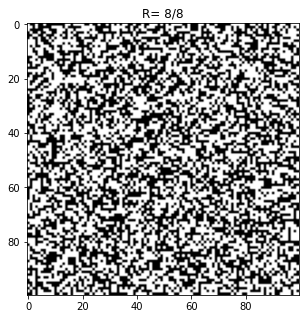

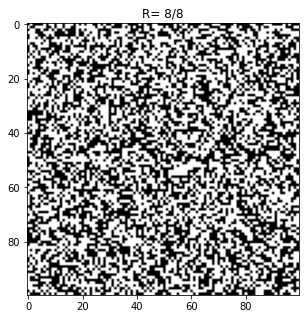

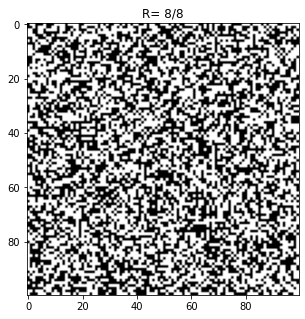

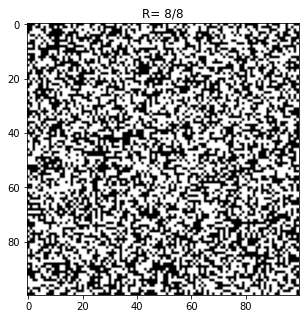

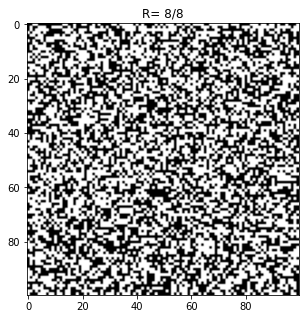

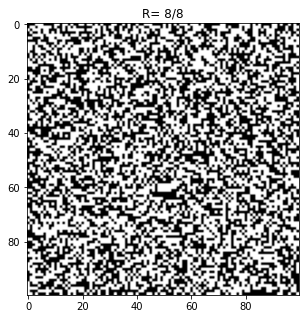

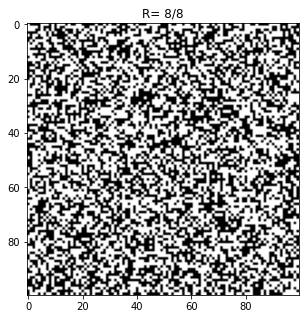

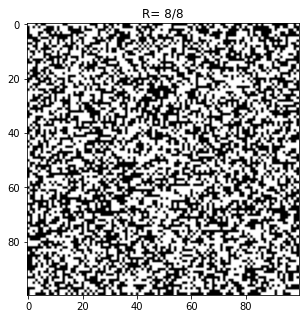

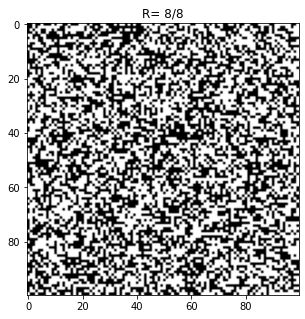

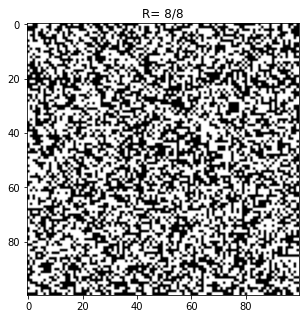

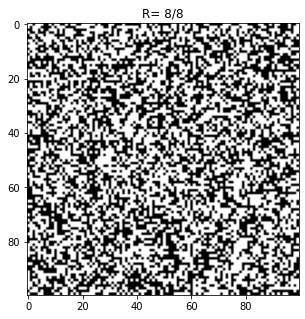

In [4]:
# i have manually changed all r-values and save all gifs
r_index = 8

area = generate_area(side_size)

area_plots = []
for i in tqdm(range(num_iters + 1)):
    fig = plt.figure(figsize=(5, 5))

    plt.title('R= {}/8'.format(int(8 * r_vals[r_index])))
    plt.imshow(area[1:-1, 1:-1], cmap='Greys')
    plt.savefig('evolution.png')

    area_plots.append(imageio.imread('evolution.png'))
    
    vacant_cells = get_vacant_cells(area, r_vals[r_index])
    area = get_moved_area(area, vacant_cells)

    hld_vacant[int(8*r_vals[r_index])].append(len(vacant_cells))

In [ ]:
imageio.mimsave('area_evolution_88.gif', area_plots)

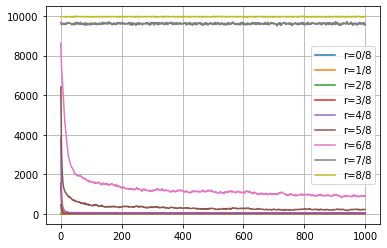

In [41]:

plt.figure()
for ind in hld_vacant.keys():
    plt.plot(np.arange(len(hld_vacant[ind])), hld_vacant[ind], label='r={}/8'.format(ind))

plt.grid(True)
plt.legend()
plt.show()

In [43]:
import pickle 
with open('changes.pickle', 'wb') as handle:
    pickle.dump(hld_vacant, handle, protocol=pickle.HIGHEST_PROTOCOL)